# Day 09. Exercise 00
# Regularization

## 0. Imports

In [356]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import pickle

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [ ]:
df = pd.read_csv('../data/dayofweek.csv')
df

,numTrials,hour,day-ofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,uid_user_18,uid_user_19,uid_user_2,uid_user_20,uid_user_21,uid_user_22,uid_user_23,uid_user_24,uid_user_25,uid_user_26,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8,labname_code_rvw,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = df.drop('day-ofweek', axis=1)
y = df['day-ofweek']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [ ]:
def print_score(input_model):
  s = []
  for train, valid in cv.split(X_train, y_train):
    input_model.fit(X_train.iloc[train], y_train.iloc[train])
    train_pred = input_model.predict(X_train.iloc[train])
    train = accuracy_score(y_train.iloc[train], train_pred)
    valid_pred = input_model.predict(X_train.iloc[valid])
    valids = accuracy_score(y_train.iloc[valid], valid_pred)
    s.append(valids)
    print("train - %.5f | " %train, end='')
    print("valid - %.5f " %valids)

  print('Average accuracy on crossval is  %.5f ' %np.mean(s))
  print('Std is %.5f ' %np.std(s))

In [ ]:
%%time
log_reg = LogisticRegression(fit_intercept=False, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(log_reg)

train - 0.62902 | valid - 0.59259 
train - 0.64633 | valid - 0.62963 
train - 0.63479 | valid - 0.56296 
train - 0.65622 | valid - 0.61481 
train - 0.63397 | valid - 0.57778 
train - 0.64056 | valid - 0.59259 
train - 0.64138 | valid - 0.65926 
train - 0.65952 | valid - 0.56296 
train - 0.64333 | valid - 0.59701 
train - 0.63674 | valid - 0.62687 
Average accuracy on crossval is  0.60165 
Std is 0.02943 
CPU times: user 1.42 s, sys: 1.01 s, total: 2.43 s
Wall time: 1.3 s


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [ ]:
%%time
log_reg = LogisticRegression(fit_intercept=False, random_state=21, penalty='l1', solver = 'liblinear')
cv = StratifiedKFold(n_splits=10)
print_score(log_reg)

train - 0.61830 | valid - 0.54815 
train - 0.62737 | valid - 0.62222 
train - 0.60511 | valid - 0.54074 
train - 0.63644 | valid - 0.62222 
train - 0.62407 | valid - 0.55556 
train - 0.62325 | valid - 0.58519 
train - 0.61253 | valid - 0.63704 
train - 0.64716 | valid - 0.58519 
train - 0.63015 | valid - 0.59701 
train - 0.61367 | valid - 0.59701 
Average accuracy on crossval is  0.58903 
Std is 0.03129 
CPU times: user 489 ms, sys: 372 ms, total: 861 ms
Wall time: 457 ms


In [ ]:
%%time
log_reg = LogisticRegression(fit_intercept=False, random_state=21, penalty='l2', solver = 'liblinear')
cv = StratifiedKFold(n_splits=10)
print_score(log_reg)

train - 0.61006 | valid - 0.56296 
train - 0.61665 | valid - 0.61481 
train - 0.61336 | valid - 0.59259 
train - 0.62902 | valid - 0.60741 
train - 0.60923 | valid - 0.55556 
train - 0.61500 | valid - 0.57778 
train - 0.61665 | valid - 0.61481 
train - 0.64056 | valid - 0.53333 
train - 0.62109 | valid - 0.58209 
train - 0.61120 | valid - 0.57463 
Average accuracy on crossval is  0.58160 
Std is 0.02532 
CPU times: user 338 ms, sys: 270 ms, total: 608 ms
Wall time: 325 ms


In [ ]:
%%time
log_reg = LogisticRegression(fit_intercept=False, random_state=21, penalty='none', solver='newton-cg')
cv = StratifiedKFold(n_splits=10)
print_score(log_reg)

train - 0.66694 | valid - 0.63704 
train - 0.65787 | valid - 0.65926 
train - 0.66694 | valid - 0.57778 
train - 0.66529 | valid - 0.62963 
train - 0.66694 | valid - 0.62222 
train - 0.65952 | valid - 0.57778 
train - 0.65045 | valid - 0.69630 
train - 0.68425 | valid - 0.61481 
train - 0.66474 | valid - 0.62687 
train - 0.65651 | valid - 0.60448 
Average accuracy on crossval is  0.62462 
Std is 0.03379 
CPU times: user 7.31 s, sys: 3.97 s, total: 11.3 s
Wall time: 5.88 s


## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [316]:
model_svm = svm.SVC(probability=True, kernel='linear', random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_svm)

train - 0.70486 | valid - 0.65926 
train - 0.69662 | valid - 0.75556 
train - 0.69415 | valid - 0.62222 
train - 0.70239 | valid - 0.65185 
train - 0.69085 | valid - 0.65185 
train - 0.68920 | valid - 0.64444 
train - 0.69250 | valid - 0.72593 
train - 0.70074 | valid - 0.62222 
train - 0.69605 | valid - 0.61940 
train - 0.71087 | valid - 0.63433 
Average accuracy on crossval is  0.65871 
Std is 0.04359 


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [317]:
model_svm = svm.SVC(probability=True, kernel='linear', random_state=21, C = 10)
cv = StratifiedKFold(n_splits=10)
print_score(model_svm)

train - 0.75021 | valid - 0.72593 
train - 0.77741 | valid - 0.82963 
train - 0.78566 | valid - 0.68148 
train - 0.76834 | valid - 0.73333 
train - 0.75185 | valid - 0.77778 
train - 0.75598 | valid - 0.68889 
train - 0.76257 | valid - 0.74074 
train - 0.77411 | valid - 0.68889 
train - 0.78254 | valid - 0.71642 
train - 0.78418 | valid - 0.69403 
Average accuracy on crossval is  0.72771 
Std is 0.04417 


In [318]:
model_svm = svm.SVC(probability=True, kernel='linear', random_state=21, C = 50)
cv = StratifiedKFold(n_splits=10)
print_score(model_svm)

train - 0.78318 | valid - 0.75556 
train - 0.79720 | valid - 0.83704 
train - 0.80709 | valid - 0.72593 
train - 0.78236 | valid - 0.76296 
train - 0.78483 | valid - 0.77778 
train - 0.79637 | valid - 0.74074 
train - 0.78236 | valid - 0.77037 
train - 0.79967 | valid - 0.72593 
train - 0.79407 | valid - 0.70896 
train - 0.80066 | valid - 0.73881 
Average accuracy on crossval is  0.75441 
Std is 0.03438 


In [319]:
model_svm = svm.SVC(probability=True, kernel='linear', random_state=21, C = 90)
cv = StratifiedKFold(n_splits=10)
print_score(model_svm)

train - 0.78401 | valid - 0.74815 
train - 0.79720 | valid - 0.83704 
train - 0.80874 | valid - 0.72593 
train - 0.79060 | valid - 0.76296 
train - 0.78895 | valid - 0.77778 
train - 0.79720 | valid - 0.74815 
train - 0.78401 | valid - 0.77037 
train - 0.80297 | valid - 0.72593 
train - 0.79819 | valid - 0.70896 
train - 0.79984 | valid - 0.73881 
Average accuracy on crossval is  0.75441 
Std is 0.03422 


## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [328]:
model_tree = DecisionTreeClassifier(max_depth=10, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_tree)

train - 0.81039 | valid - 0.74074 
train - 0.77741 | valid - 0.74074 
train - 0.83347 | valid - 0.70370 
train - 0.79720 | valid - 0.76296 
train - 0.82440 | valid - 0.75556 
train - 0.80379 | valid - 0.68889 
train - 0.80709 | valid - 0.76296 
train - 0.80132 | valid - 0.65926 
train - 0.80807 | valid - 0.75373 
train - 0.80478 | valid - 0.68657 
Average accuracy on crossval is  0.72551 
Std is 0.03562 


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [329]:
model_tree = DecisionTreeClassifier(max_depth=2, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_tree)

train - 0.43034 | valid - 0.47407 
train - 0.43281 | valid - 0.45185 
train - 0.44023 | valid - 0.38519 
train - 0.43034 | valid - 0.47407 
train - 0.43776 | valid - 0.40741 
train - 0.43364 | valid - 0.44444 
train - 0.43364 | valid - 0.44444 
train - 0.43776 | valid - 0.40741 
train - 0.41763 | valid - 0.38806 
train - 0.43657 | valid - 0.41791 
Average accuracy on crossval is  0.42949 
Std is 0.03116 


In [330]:
model_tree = DecisionTreeClassifier(max_depth=6, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_tree)

train - 0.64880 | valid - 0.57778 
train - 0.62077 | valid - 0.60000 
train - 0.64468 | valid - 0.60000 
train - 0.65293 | valid - 0.62222 
train - 0.66447 | valid - 0.62963 
train - 0.62572 | valid - 0.54074 
train - 0.65293 | valid - 0.62963 
train - 0.64551 | valid - 0.56296 
train - 0.64580 | valid - 0.62687 
train - 0.65239 | valid - 0.56716 
Average accuracy on crossval is  0.59570 
Std is 0.03040 


In [331]:
model_tree = DecisionTreeClassifier(max_depth=14, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_tree)

train - 0.94312 | valid - 0.82963 
train - 0.91344 | valid - 0.85185 
train - 0.93735 | valid - 0.85185 
train - 0.93322 | valid - 0.85926 
train - 0.94394 | valid - 0.88889 
train - 0.91921 | valid - 0.80741 
train - 0.94064 | valid - 0.88889 
train - 0.93487 | valid - 0.86667 
train - 0.92669 | valid - 0.83582 
train - 0.92586 | valid - 0.84328 
Average accuracy on crossval is  0.85235 
Std is 0.02411 


In [332]:
model_tree = DecisionTreeClassifier(max_depth=18, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_tree)

train - 0.98351 | valid - 0.88148 
train - 0.97939 | valid - 0.89630 
train - 0.97939 | valid - 0.86667 
train - 0.98021 | valid - 0.90370 
train - 0.98186 | valid - 0.86667 
train - 0.97197 | valid - 0.84444 
train - 0.97774 | valid - 0.91111 
train - 0.98516 | valid - 0.88889 
train - 0.98353 | valid - 0.85821 
train - 0.97858 | valid - 0.88806 
Average accuracy on crossval is  0.88055 
Std is 0.02008 


In [333]:
model_tree = DecisionTreeClassifier(max_depth=22, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_tree)

train - 0.99423 | valid - 0.85926 
train - 0.99340 | valid - 0.88889 
train - 0.99423 | valid - 0.86667 
train - 0.99588 | valid - 0.89630 
train - 0.99423 | valid - 0.88148 
train - 0.99093 | valid - 0.85926 
train - 0.99176 | valid - 0.91852 
train - 0.99588 | valid - 0.88148 
train - 0.99753 | valid - 0.86567 
train - 0.99176 | valid - 0.88060 
Average accuracy on crossval is  0.87981 
Std is 0.01754 


## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [335]:
model_random_tree = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_random_tree)

train - 0.96455 | valid - 0.88148 
train - 0.96208 | valid - 0.91852 
train - 0.96785 | valid - 0.86667 
train - 0.96455 | valid - 0.89630 
train - 0.96538 | valid - 0.91111 
train - 0.96538 | valid - 0.88148 
train - 0.97115 | valid - 0.91852 
train - 0.96867 | valid - 0.85185 
train - 0.97364 | valid - 0.88060 
train - 0.97941 | valid - 0.86567 
Average accuracy on crossval is  0.88722 
Std is 0.02204 


### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [336]:
model_random_tree = RandomForestClassifier(n_estimators=25, max_depth=14, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_random_tree)

train - 0.96373 | valid - 0.88148 
train - 0.94312 | valid - 0.89630 
train - 0.95960 | valid - 0.84444 
train - 0.95796 | valid - 0.88889 
train - 0.96620 | valid - 0.90370 
train - 0.96373 | valid - 0.85926 
train - 0.96373 | valid - 0.90370 
train - 0.95960 | valid - 0.85926 
train - 0.96211 | valid - 0.88806 
train - 0.96293 | valid - 0.87313 
Average accuracy on crossval is  0.87982 
Std is 0.01925 


In [337]:
model_random_tree = RandomForestClassifier(n_estimators=75, max_depth=14, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_random_tree)

train - 0.96538 | valid - 0.88148 
train - 0.96538 | valid - 0.91111 
train - 0.97279 | valid - 0.88148 
train - 0.96950 | valid - 0.89630 
train - 0.97032 | valid - 0.91111 
train - 0.96950 | valid - 0.87407 
train - 0.97279 | valid - 0.91111 
train - 0.96702 | valid - 0.85926 
train - 0.97529 | valid - 0.88060 
train - 0.97694 | valid - 0.85821 
Average accuracy on crossval is  0.88647 
Std is 0.01922 


In [338]:
model_random_tree = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_random_tree)

train - 0.73042 | valid - 0.65185 
train - 0.70899 | valid - 0.72593 
train - 0.72383 | valid - 0.62963 
train - 0.72795 | valid - 0.67407 
train - 0.73619 | valid - 0.71852 
train - 0.75433 | valid - 0.68148 
train - 0.73124 | valid - 0.74074 
train - 0.73372 | valid - 0.62963 
train - 0.74629 | valid - 0.67910 
train - 0.72076 | valid - 0.65672 
Average accuracy on crossval is  0.67877 
Std is 0.03703 


In [339]:
model_random_tree = RandomForestClassifier(n_estimators=50, max_depth=21, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_random_tree)

train - 0.99670 | valid - 0.88889 
train - 0.99835 | valid - 0.95556 
train - 0.99835 | valid - 0.88889 
train - 0.99835 | valid - 0.91852 
train - 0.99753 | valid - 0.91852 
train - 0.99753 | valid - 0.89630 
train - 0.99753 | valid - 0.91852 
train - 0.99835 | valid - 0.90370 
train - 0.99835 | valid - 0.93284 
train - 0.99753 | valid - 0.85075 
Average accuracy on crossval is  0.90725 
Std is 0.02714 


In [340]:
model_random_tree = RandomForestClassifier(n_estimators=75, max_depth=21, random_state=21)
cv = StratifiedKFold(n_splits=10)
print_score(model_random_tree)

train - 0.99835 | valid - 0.89630 
train - 0.99918 | valid - 0.93333 
train - 0.99835 | valid - 0.90370 
train - 0.99753 | valid - 0.92593 
train - 0.99753 | valid - 0.91852 
train - 0.99670 | valid - 0.88889 
train - 0.99753 | valid - 0.91852 
train - 0.99835 | valid - 0.89630 
train - 0.99918 | valid - 0.92537 
train - 0.99835 | valid - 0.87313 
Average accuracy on crossval is  0.90800 
Std is 0.01833 


## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [349]:
model_random_tree = RandomForestClassifier(n_estimators=75, max_depth=21, random_state=21)
cv = StratifiedKFold(n_splits=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model_random_tree.fit(X_train, y_train)
y_pred=model_random_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8994082840236687

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


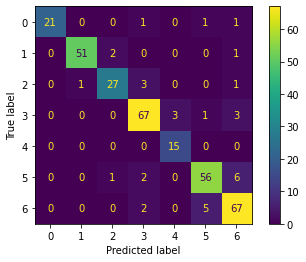

In [355]:
plot_confusion_matrix(model_random_tree, X_test, y_test)
plt.show()

In [357]:
filename = 'model_random_tree.sav'
pickle.dump(model_random_tree, open(filename, 'wb'))